In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('CarPricesPrediction-Copy1.csv')

In [3]:
df.head()

,id,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1000 non-null   int64  
 1   Make       1000 non-null   object 
 2   Model      1000 non-null   object 
 3   Year       1000 non-null   int64  
 4   Mileage    1000 non-null   int64  
 5   Condition  1000 non-null   object 
 6   Price      1000 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [5]:
df.isnull().sum()

id           0
Make         0
Model        0
Year         0
Mileage      0
Condition    0
Price        0
dtype: int64

In [6]:
(df.isnull().sum()/ len(df))*100

id           0.0
Make         0.0
Model        0.0
Year         0.0
Mileage      0.0
Condition    0.0
Price        0.0
dtype: float64

In [7]:
df.shape

(1000, 7)

In [8]:
df.describe()

,id,Year,Mileage,Price
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,499.500000,2015.86500,78796.927000,22195.205650
std,288.819436,3.78247,39842.259941,4245.191585
min,0.000000,2010.00000,10079.000000,12613.000000
25%,249.750000,2013.00000,44942.750000,18961.862500
50%,499.500000,2016.00000,78056.500000,22247.875000
75%,749.250000,2019.00000,112366.250000,25510.275000
max,999.000000,2022.00000,149794.000000,31414.900000


In [9]:
numeric_cols=df.select_dtypes(include=[np.number])

In [10]:
non_numeric_cols=df.select_dtypes(exclude=[np.number])

In [11]:
numeric_cols.fillna(numeric_cols.mean(),inplace=True)

In [12]:
non_numeric_cols.fillna(non_numeric_cols.mode(), inplace=True)

In [13]:
notnulldata=pd.concat([numeric_cols,non_numeric_cols],axis=1)

In [14]:
notnulldata.isnull().sum()

id           0
Year         0
Mileage      0
Price        0
Make         0
Model        0
Condition    0
dtype: int64

In [15]:
notnulldata.head()

,id,Year,Mileage,Price,Make,Model,Condition
0,0,2022,18107,19094.75,Ford,Silverado,Excellent
1,1,2014,13578,27321.10,Toyota,Silverado,Excellent
2,2,2016,46054,23697.30,Chevrolet,Civic,Good
3,3,2022,34981,18251.05,Ford,Civic,Excellent
4,4,2019,63565,19821.85,Chevrolet,Civic,Excellent


In [16]:
# df['gender'].value_counts()
# df = df[df['gender'] != 'Other']
# en_data=df[["gender","ever_married","Residence_type",]]

df["Condition"].unique()

array(['Excellent', 'Good', 'Fair'], dtype=object)

In [17]:
# df['Condition'].value_counts()
df=df[df['Condition']!='Fair']
df['Condition'].value_counts()

Condition
Excellent    595
Good         292
Name: count, dtype: int64

In [18]:
en_data=df[["Condition"]] 

In [19]:
pd.get_dummies(en_data,drop_first="true")

,Condition_Good
0,False
1,False
2,True
3,False
4,False
...,...
995,False
996,False
997,True
998,True


In [20]:
print(pd.get_dummies(en_data,drop_first="true").info())

<class 'pandas.core.frame.DataFrame'>
Index: 887 entries, 0 to 999
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Condition_Good  887 non-null    bool 
dtypes: bool(1)
memory usage: 7.8 KB
None


In [21]:
from sklearn.preprocessing import OneHotEncoder

In [22]:
ohe=OneHotEncoder(drop="first")

In [23]:
arr=ohe.fit_transform(en_data).toarray()
arr

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],

In [24]:
en_data_columns = ohe.get_feature_names_out(en_data.columns)
data2=pd.DataFrame(arr,columns=en_data_columns,index=df.index)
data2.head()

,Condition_Good
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0


In [25]:
df_dropped = df.drop(columns=["Condition"])
onehotencodedata = pd.concat([df_dropped, data2], axis=1)
onehotencodedata.head()

,id,Make,Model,Year,Mileage,Price,Condition_Good
0,0,Ford,Silverado,2022,18107,19094.75,0.0
1,1,Toyota,Silverado,2014,13578,27321.10,0.0
2,2,Chevrolet,Civic,2016,46054,23697.30,1.0
3,3,Ford,Civic,2022,34981,18251.05,0.0
4,4,Chevrolet,Civic,2019,63565,19821.85,0.0


In [26]:
onehotencodedata.rename(columns={"Condition_Good":"Condition_Good_or_Excellent"},inplace=True)

In [27]:
onehotencodedata.head()

,id,Make,Model,Year,Mileage,Price,Condition_Good_or_Excellent
0,0,Ford,Silverado,2022,18107,19094.75,0.0
1,1,Toyota,Silverado,2014,13578,27321.10,0.0
2,2,Chevrolet,Civic,2016,46054,23697.30,1.0
3,3,Ford,Civic,2022,34981,18251.05,0.0
4,4,Chevrolet,Civic,2019,63565,19821.85,0.0


In [28]:
df.head()

,id,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()

In [31]:
df['Model'].unique()

array(['Silverado', 'Civic', 'Altima', 'Camry', 'F-150'], dtype=object)

In [32]:
le.fit(df[['Model']])

C:\Anaconda\envs\ml_env\lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

In [33]:
le.transform(df['Model'])

array([4, 4, 2, 2, 2, 4, 0, 4, 1, 0, 0, 4, 4, 4, 3, 3, 0, 1, 2, 4, 1, 4,
       0, 2, 3, 4, 1, 2, 3, 0, 1, 4, 1, 0, 3, 4, 1, 2, 1, 3, 1, 0, 2, 2,
       3, 1, 0, 0, 4, 0, 1, 2, 2, 4, 4, 1, 2, 3, 3, 4, 1, 1, 0, 3, 1, 3,
       0, 0, 0, 3, 3, 2, 2, 4, 1, 0, 4, 0, 4, 0, 4, 2, 4, 2, 3, 0, 3, 0,
       3, 2, 2, 3, 4, 3, 0, 2, 0, 1, 2, 1, 0, 2, 0, 3, 3, 1, 3, 2, 4, 1,
       0, 0, 4, 2, 4, 1, 0, 3, 4, 3, 2, 1, 1, 0, 0, 3, 3, 4, 1, 2, 0, 0,
       4, 4, 3, 2, 0, 3, 2, 0, 1, 4, 1, 2, 1, 4, 3, 3, 4, 2, 2, 4, 4, 4,
       3, 2, 3, 3, 2, 2, 4, 4, 2, 3, 2, 3, 3, 2, 0, 2, 2, 3, 4, 3, 0, 3,
       3, 3, 0, 0, 1, 2, 4, 3, 2, 4, 1, 3, 3, 1, 2, 1, 1, 1, 3, 1, 0, 1,
       3, 1, 1, 0, 0, 3, 2, 4, 0, 0, 2, 4, 1, 0, 3, 1, 0, 0, 1, 4, 3, 3,
       0, 4, 2, 2, 2, 4, 1, 0, 0, 2, 4, 0, 4, 4, 0, 1, 1, 1, 3, 3, 0, 3,
       2, 4, 4, 4, 2, 4, 4, 4, 2, 1, 0, 0, 2, 4, 4, 3, 1, 2, 4, 1, 1, 2,
       0, 3, 4, 2, 0, 2, 2, 3, 3, 4, 4, 3, 4, 0, 1, 2, 4, 1, 1, 0, 0, 0,
       3, 3, 2, 4, 0, 3, 2, 1, 4, 1, 0, 4, 1, 2, 0,

In [34]:
df['Model']=le.transform(df['Model'])

In [35]:
df.head()

,id,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,4,2022,18107,Excellent,19094.75
1,1,Toyota,4,2014,13578,Excellent,27321.10
2,2,Chevrolet,2,2016,46054,Good,23697.30
3,3,Ford,2,2022,34981,Excellent,18251.05
4,4,Chevrolet,2,2019,63565,Excellent,19821.85


In [36]:
df['Make'].unique()

array(['Ford', 'Toyota', 'Chevrolet', 'Nissan', 'Honda'], dtype=object)

In [37]:
from sklearn.preprocessing import OrdinalEncoder

In [38]:
en_Make=[["Ford","Toyota",'Chevrolet', 'Nissan', 'Honda']]

In [39]:
oe= OrdinalEncoder(categories=en_Make)
oe.fit(df[['Make']])

OrdinalEncoder(categories=[['Ford', 'Toyota', 'Chevrolet', 'Nissan', 'Honda']])

In [40]:
df['en_Make']=oe.transform(df[['Make']])

In [41]:
df.head()

,id,Make,Model,Year,Mileage,Condition,Price,en_Make
0,0,Ford,4,2022,18107,Excellent,19094.75,0.0
1,1,Toyota,4,2014,13578,Excellent,27321.10,1.0
2,2,Chevrolet,2,2016,46054,Good,23697.30,2.0
3,3,Ford,2,2022,34981,Excellent,18251.05,0.0
4,4,Chevrolet,2,2019,63565,Excellent,19821.85,2.0


In [42]:
df.drop(columns=['Make'],inplace=True)

In [43]:
df.head()

,id,Model,Year,Mileage,Condition,Price,en_Make
0,0,4,2022,18107,Excellent,19094.75,0.0
1,1,4,2014,13578,Excellent,27321.10,1.0
2,2,2,2016,46054,Good,23697.30,2.0
3,3,2,2022,34981,Excellent,18251.05,0.0
4,4,2,2019,63565,Excellent,19821.85,2.0


In [44]:
import matplotlib.pyplot as plt

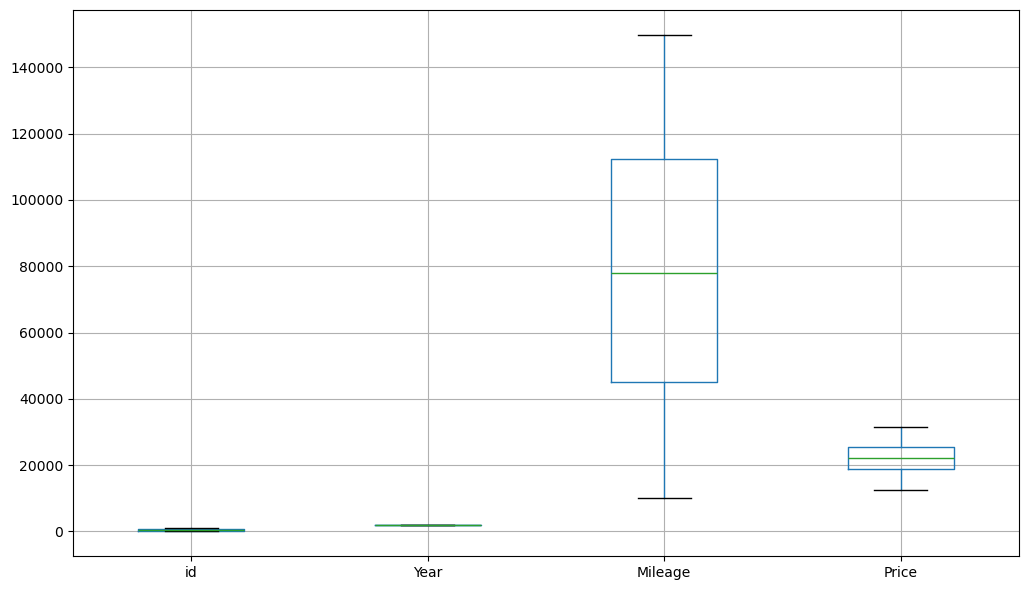

In [45]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
numeric_cols.boxplot()
plt.tight_layout()
plt.show()

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
ss=StandardScaler()

In [48]:
numeric_data = numeric_cols


In [49]:
ss_data=pd.DataFrame(ss.fit_transform(numeric_cols),index=numeric_cols.index,columns=numeric_data.columns)

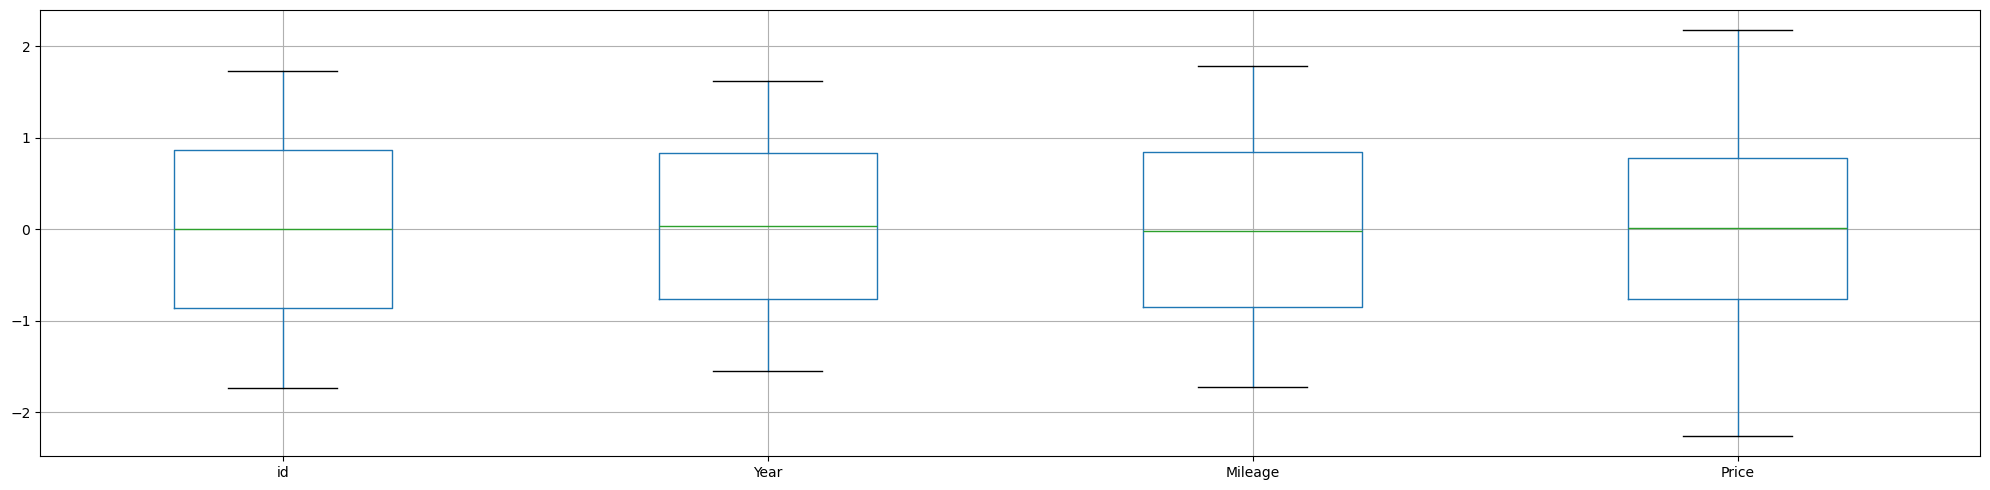

In [50]:
plt.figure(figsize=(20,5))
ss_data.boxplot()
plt.tight_layout()
plt.show()

In [51]:
ss_data.head()

,id,Year,Mileage,Price
0,-1.730320,1.622767,-1.524017,-0.730711
1,-1.726856,-0.493311,-1.637747,1.208063
2,-1.723391,0.035709,-0.822225,0.354011
3,-1.719927,1.622767,-1.100285,-0.929553
4,-1.716463,0.829238,-0.382497,-0.559349


In [52]:
from sklearn.preprocessing import FunctionTransformer
import seaborn as sns
df=pd.read_csv("sample_data.csv")
df.head()

,Age,Salary,Experience
0,25,50000,1.0
1,30,60000,3.0
2,45,120000,15.0
3,35,80000,7.0
4,40,95000,10.0


<Axes: >

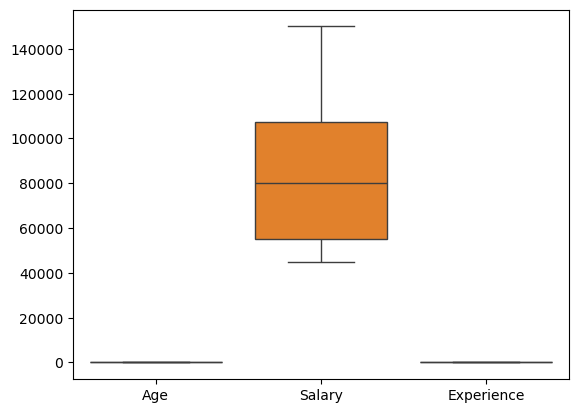

In [53]:
sns.boxplot(df)

In [54]:

q1=df.quantile(0.25)
q3=df.quantile(0.75)

In [55]:
iqr=q3-q1

In [56]:
cleaned_data = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]

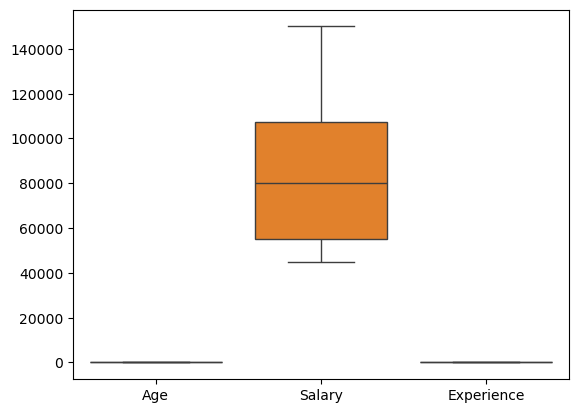

In [57]:
sns.boxplot(cleaned_data)
plt.show()

In [58]:
ft= FunctionTransformer(func=np.log1p)

In [59]:
df.head()

,Age,Salary,Experience
0,25,50000,1.0
1,30,60000,3.0
2,45,120000,15.0
3,35,80000,7.0
4,40,95000,10.0


In [60]:
ft_data= ft.fit_transform(cleaned_data[['Salary','Experience']])

In [61]:
ft_data.head()

,Salary,Experience
0,10.819798,0.693147
1,11.002117,1.386294
2,11.695255,2.772589
3,11.289794,2.079442
4,11.461643,2.397895


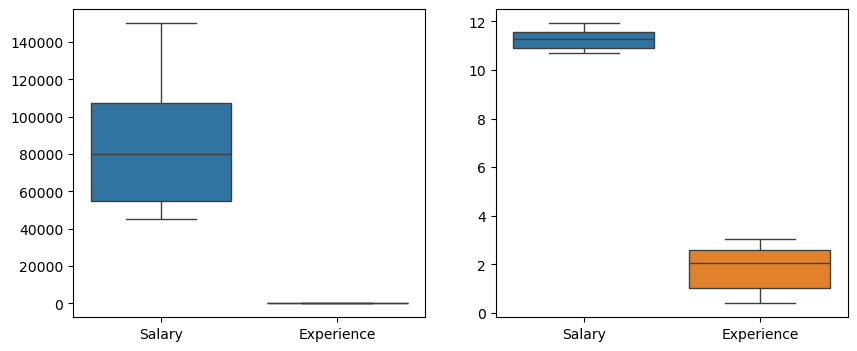

In [62]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(df[['Salary','Experience']])

plt.subplot(1,2,2)
sns.boxplot(ft_data)
plt.show()


In [63]:
numeric_cols=ft_data.select_dtypes(include=[np.number])
ss_tfd=pd.DataFrame(ss.fit_transform(numeric_cols),index=numeric_cols.index,columns=numeric_cols.columns)

Text(0.5, 1.0, 'Before outliers')

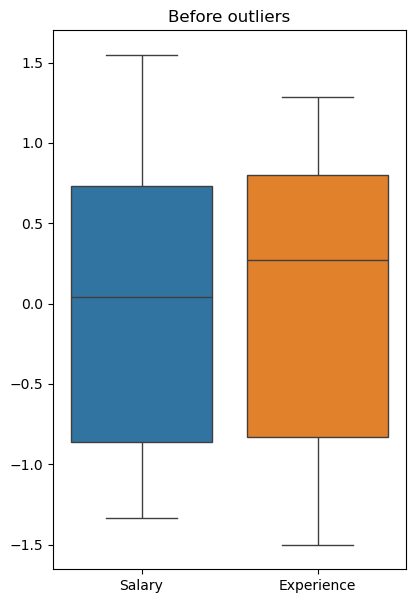

In [64]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.boxplot(ss_tfd)
plt.title('Before outliers')

In [65]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [66]:
df=pd.read_csv('CarPricesPrediction-Copy1.csv')
df.head()

,id,Make,Model,Year,Mileage,Condition,Price
0,0,Ford,Silverado,2022,18107,Excellent,19094.75
1,1,Toyota,Silverado,2014,13578,Excellent,27321.10
2,2,Chevrolet,Civic,2016,46054,Good,23697.30
3,3,Ford,Civic,2022,34981,Excellent,18251.05
4,4,Chevrolet,Civic,2019,63565,Excellent,19821.85


In [67]:
df_numeric_cols=df.select_dtypes(include=[np.number])
df_numeric_cols.head()

,id,Year,Mileage,Price
0,0,2022,18107,19094.75
1,1,2014,13578,27321.10
2,2,2016,46054,23697.30
3,3,2022,34981,18251.05
4,4,2019,63565,19821.85


In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
x=df_numeric_cols.iloc[:,:-1]
x.shape

(1000, 3)

In [70]:
y=df_numeric_cols['Price']

In [71]:
x.head()

,id,Year,Mileage
0,0,2022,18107
1,1,2014,13578
2,2,2016,46054
3,3,2022,34981
4,4,2019,63565


In [72]:
lr= LinearRegression()

In [73]:
fs= SequentialFeatureSelector(lr,k_features=3,forward=True)

In [74]:
fs.k_features

3

In [75]:
fs.fit(x,y)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(3, 3),
                          scoring='r2')

In [76]:
fs.k_feature_names_

('id', 'Year', 'Mileage')

In [77]:
fs.k_score_

np.float64(0.9999999997589197)

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x=df_numeric_cols.iloc[:,:-1]
y=df_numeric_cols['Price']

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [81]:
x_train.shape, x_test.shape

((800, 3), (200, 3))

In [82]:
y_train.shape, y_test.shape

((800,), (200,))

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df=pd.read_csv('score.csv')

In [85]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [86]:
df.shape

(25, 2)

In [87]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [88]:
df['Hours'].unique()

array([2.5, 5.1, 3.2, 8.5, 3.5, 1.5, 9.2, 5.5, 8.3, 2.7, 7.7, 5.9, 4.5,
       3.3, 1.1, 8.9, 1.9, 6.1, 7.4, 4.8, 3.8, 6.9, 7.8])

In [89]:
df['Scores'].unique()

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 24,
       67, 69, 54, 35, 76, 86])

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


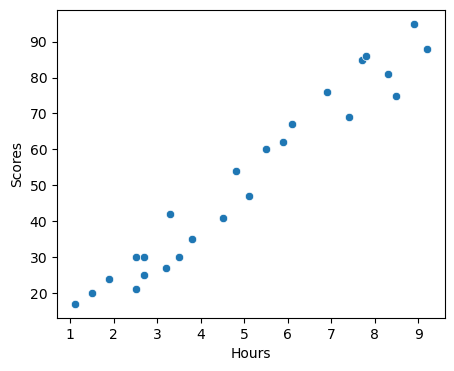

In [91]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="Hours",y='Scores',data=df)
plt.show()

In [92]:
x=df.iloc[:,:-1]

In [93]:
x.head()

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [94]:
y=df['Scores']

In [95]:
lr=LinearRegression()

In [96]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [97]:
fs=SequentialFeatureSelector(lr,k_features=1,forward=True)

In [98]:
fs.k_features

1

In [99]:
fs.fit(x,y)
# print(x.shape[1])


SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 1),
                          scoring='r2')

In [100]:
fs.feature_names

['Hours']

In [101]:
fs.k_feature_names_

('Hours',)

In [102]:
fs.k_score_

np.float64(0.9180771341891051)

In [103]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25, random_state=42)

In [104]:
lr.fit(x_train,y_train)

LinearRegression()

In [105]:
lr.coef_

array([9.71409219])

In [106]:
lr.intercept_

np.float64(2.480367091505748)

In [107]:
lr.predict([[2.5]])

C:\Anaconda\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([26.76559757])

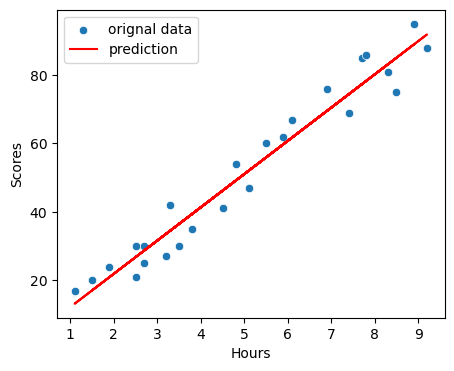

In [108]:
plt.figure(figsize=(5,4))
sns.scatterplot(x="Hours",y='Scores',data=df)
plt.plot(df['Hours'],lr.predict(x),c="red")
plt.legend(['orignal data','prediction'])
plt.show()

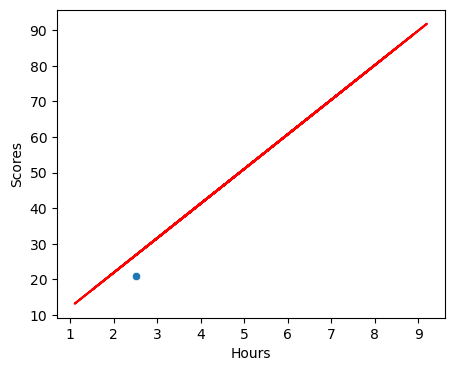

In [109]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x="Hours", y="Scores", data=df.iloc[[0]])
plt.plot(df['Hours'], lr.predict(x), c="red")
plt.show()


In [110]:
multiple_regression= pd.read_csv('salary_data.csv')

In [111]:
multiple_regression.head()

,Education_Level,Years_of_Experience,Age,Salary
0,12,1,22,25000
1,16,3,25,40000
2,14,5,28,45000
3,16,7,30,60000
4,18,10,35,75000


In [112]:
multiple_regression.isnull().sum()

Education_Level        0
Years_of_Experience    0
Age                    0
Salary                 0
dtype: int64

In [113]:
multiple_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Education_Level      10 non-null     int64
 1   Years_of_Experience  10 non-null     int64
 2   Age                  10 non-null     int64
 3   Salary               10 non-null     int64
dtypes: int64(4)
memory usage: 448.0 bytes


In [114]:
from sklearn.model_selection import train_test_split

In [115]:
x=multiple_regression.iloc[:,:-1]

In [116]:
y=multiple_regression['Salary']

In [117]:
x.shape


(10, 3)

In [118]:
y.shape

(10,)

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

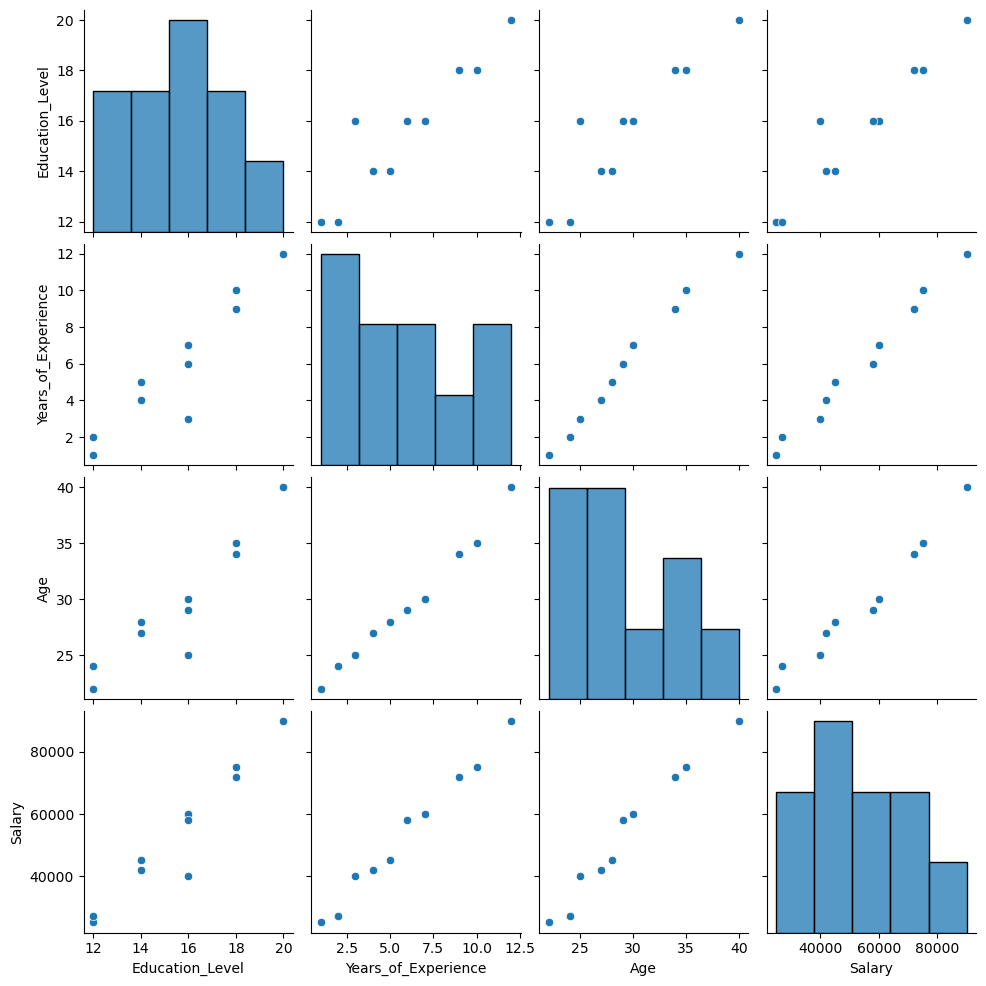

In [120]:
sns.pairplot(data=multiple_regression)
plt.show()

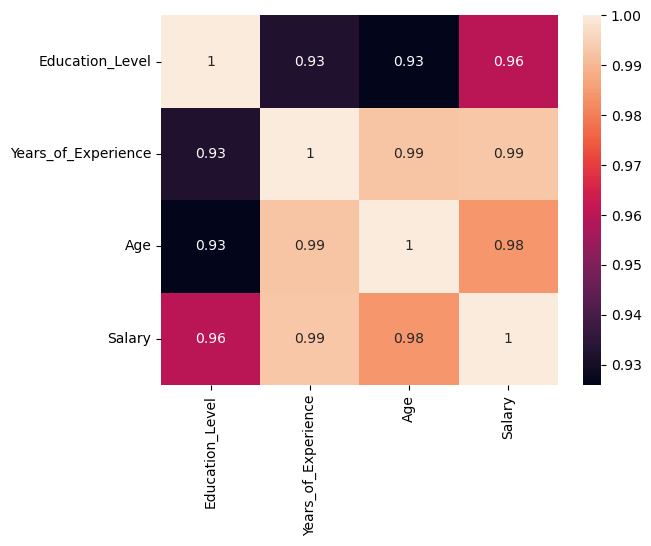

In [121]:
sns.heatmap(data=multiple_regression.corr(),annot=True)
plt.show()

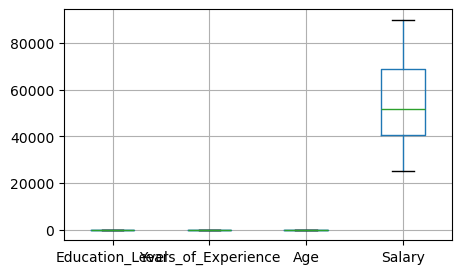

In [122]:
plt.figure(figsize=(5,3))
multiple_regression.boxplot()
plt.show()

In [123]:
mlr=LinearRegression()

In [124]:
mlr.fit(x_train,y_train)

LinearRegression()

In [125]:
mlr.score(x_test,y_test)

0.7258362512971024

In [126]:
print(multiple_regression.iloc[[0]])
X = multiple_regression.drop('Salary', axis=1)
mlr.predict(X.iloc[[0]])

   Education_Level  Years_of_Experience  Age  Salary
0               12                    1   22   25000


array([25599.60159363])

In [127]:
mlr.predict([[12,1,22]])

C:\Anaconda\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25599.60159363])

In [128]:
polynomial_data=pd.read_csv('polynomial_data.csv')

In [129]:
polynomial_data.head()

,X,Y
0,1,10
1,2,21
2,3,38
3,4,61
4,5,90


In [130]:
polynomial_data.isnull().sum()

X    0
Y    0
dtype: int64

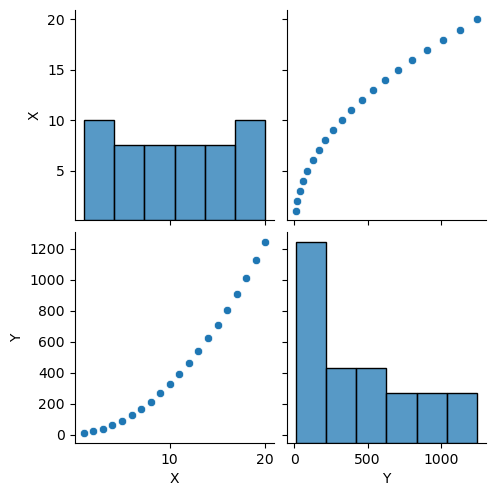

In [131]:
sns.pairplot(data=polynomial_data)
plt.show()

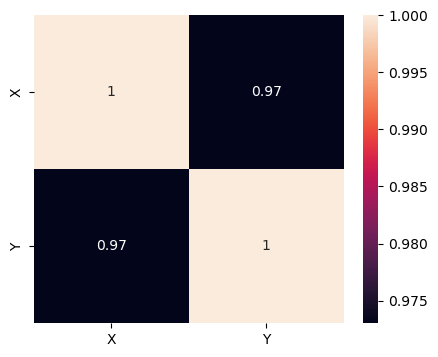

In [132]:
plt.figure(figsize=(5,4))
sns.heatmap(data=polynomial_data.corr(),annot=True)
plt.show()

In [133]:
from sklearn.preprocessing import PolynomialFeatures

In [134]:
from sklearn.model_selection import train_test_split

In [135]:
x=polynomial_data.iloc[:,:-1]

In [136]:
pf=PolynomialFeatures(degree=2)
pf.fit(x)
x=pf.transform(x)

In [137]:
y=polynomial_data.iloc[:,-1]

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [139]:
from sklearn.linear_model import LinearRegression

In [140]:
plr=LinearRegression()

In [141]:
plr.fit(x_train,y_train)

LinearRegression()

In [142]:
plr.score(x_test,y_test)

1.0

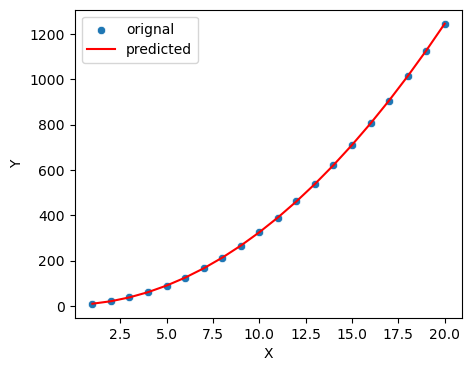

In [143]:
plt.figure(figsize=(5,4))
sns.scatterplot(x='X',y='Y',data=polynomial_data)
plt.plot(polynomial_data['X'],plr.predict(x),c='red' )
plt.legend(['orignal','predicted'])
plt.show()

In [144]:
polynomial_data.head(10)

,X,Y
0,1,10
1,2,21
2,3,38
3,4,61
4,5,90
5,6,125
6,7,166
7,8,213
8,9,266
9,10,325


In [145]:
test=pf.transform([[9]])
test

C:\Anaconda\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[ 1.,  9., 81.]])

In [146]:
plr.predict(test)

array([266.])

In [147]:
plr.coef_

array([0., 2., 3.])

In [148]:
plr.intercept_

np.float64(5.000000000000341)

In [149]:
(2*9+3*81)+5.000000000000512

266.0000000000005

In [150]:
cf_data=pd.read_csv('study_marks.csv')

In [151]:
cf_data.head()

,Hours_Studied,Marks_Obtained
0,1,10
1,2,20
2,3,29
3,4,40
4,5,48


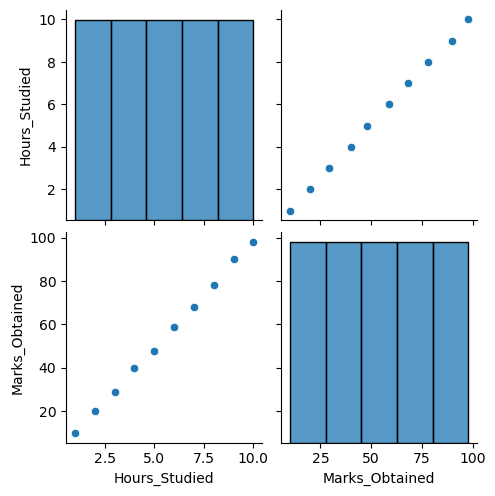

In [152]:
sns.pairplot(data=cf_data)

In [153]:
x=cf_data.iloc[:,:-1]

In [154]:
y=cf_data.iloc[:,-1]

In [155]:
x

,Hours_Studied
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [156]:
y

0    10
1    20
2    29
3    40
4    48
5    59
6    68
7    78
8    90
9    98
Name: Marks_Obtained, dtype: int64

In [157]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [158]:
lr.fit(x_train,y_train)

LinearRegression()

In [159]:
lr.score(x_test,y_test)

0.998141850081293

In [160]:
# lasso,ridge in learning_house_price_prediction.ipynb

# Classification

In [161]:
logistic_dataset=pd.read_csv('logistic_regression.csv')

In [162]:
logistic_dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [163]:
logistic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [164]:
logistic_dataset.drop(columns=['Gender','Age','User ID'],inplace=True)

In [165]:
logistic_dataset.head()

,EstimatedSalary,Purchased
0,19000,0
1,20000,0
2,43000,0
3,57000,0
4,76000,0


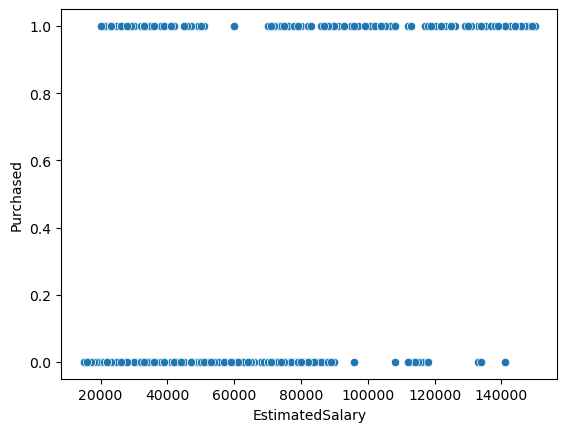

In [166]:
sns.scatterplot(x='EstimatedSalary', y='Purchased' ,data=logistic_dataset)
plt.show()

In [167]:
x=logistic_dataset[['EstimatedSalary']]
y=logistic_dataset[['Purchased']]
x.head()

,EstimatedSalary
0,19000
1,20000
2,43000
3,57000
4,76000


In [168]:
x=pd.DataFrame(ss.fit_transform(x),columns=x.columns,index=x.index)
x.head()

,EstimatedSalary
0,-1.490046
1,-1.460681
2,-0.785290
3,-0.374182
4,0.183751


In [169]:
from sklearn.model_selection import train_test_split

In [170]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [171]:
from sklearn.linear_model import LogisticRegression

In [172]:
logr=LogisticRegression()
logr.fit(x_train,y_train)

C:\Anaconda\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [173]:
logr.score(x_test,y_test)

0.7375

In [174]:
logr.predict([[12312312312]])

C:\Anaconda\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

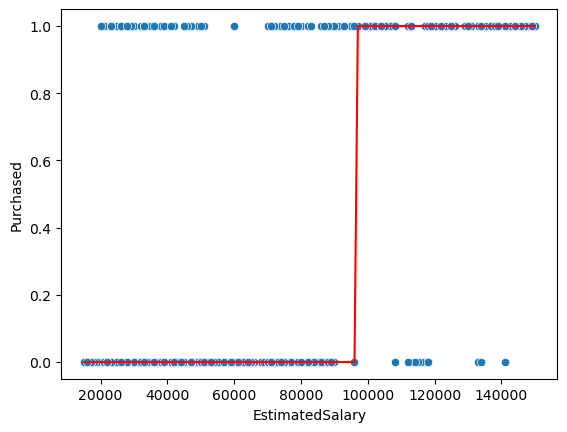

In [175]:
sns.scatterplot(x='EstimatedSalary', y='Purchased' ,data=logistic_dataset)
sns.lineplot(x='EstimatedSalary', y=logr.predict(x),data=logistic_dataset ,c='red')
plt.show()

# Polynomial Single class classification

In [176]:
pmc_data=pd.read_csv('polynomial_multiclass.csv')

In [177]:
pmc_data.head()

,x1,x2,label
0,-2.0,-1.0,0
1,-1.5,-0.5,0
2,-1.0,0.0,0
3,0.0,0.5,1
4,0.5,1.5,1


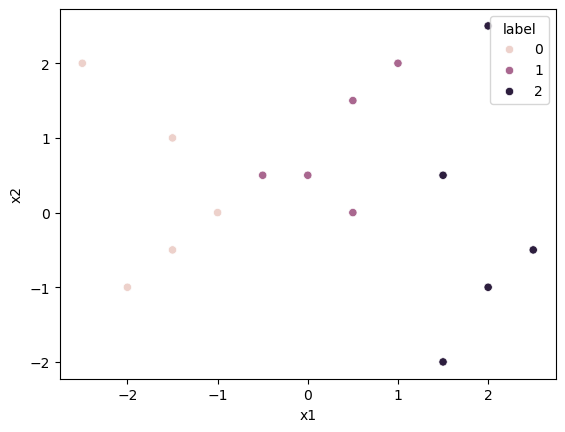

In [178]:
sns.scatterplot(x='x1',y='x2',data=pmc_data,hue='label')
plt.show()

In [179]:
pmc_data.isnull().sum()

x1       0
x2       0
label    0
dtype: int64

In [180]:
x=pmc_data.iloc[:,:-1]
y=pmc_data['label']

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2,random_state=42)

In [183]:
from sklearn.linear_model import LogisticRegression

In [184]:
lr=LogisticRegression()

In [185]:
lr.fit(x_train,y_train)

LogisticRegression()

In [186]:
lr.score(x_test,y_test)

0.5833333333333334

In [187]:
from mlxtend.plotting import plot_decision_regions

C:\Anaconda\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

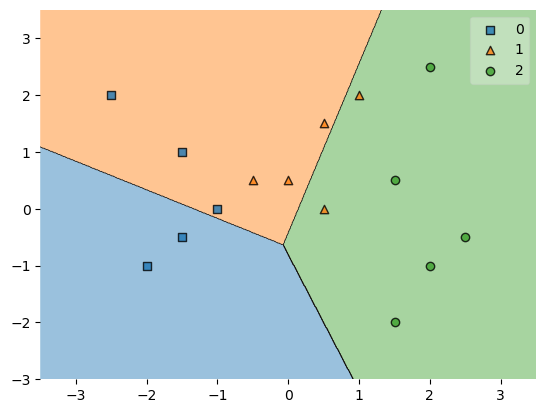

In [188]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=lr)

In [189]:
from sklearn.preprocessing import PolynomialFeatures

In [190]:
pf=PolynomialFeatures(degree=2)

In [191]:
pf.fit(x)
x=pd.DataFrame(pf.transform(x))

In [192]:
pf.get_feature_names_out()

array(['1', 'x1', 'x2', 'x1^2', 'x1 x2', 'x2^2'], dtype=object)

In [193]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [194]:
lr.fit(x_train,y_train)

LogisticRegression()

In [195]:
lr.score(x_test,y_test)

0.6666666666666666

In [196]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score

In [197]:
cf=confusion_matrix(y_test,lr.predict(x_test))
cf

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0]])

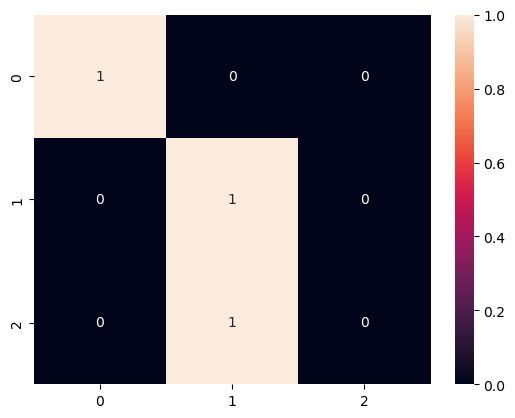

In [198]:
sns.heatmap(cf,annot=True)
plt.show()

# Polynomial multiclass classification

In [199]:
polymc_data=pd.read_csv('polynomial_multiclass.csv')

In [200]:
polymc_data.head()

,x1,x2,label
0,-2.0,-1.0,0
1,-1.5,-0.5,0
2,-1.0,0.0,0
3,0.0,0.5,1
4,0.5,1.5,1


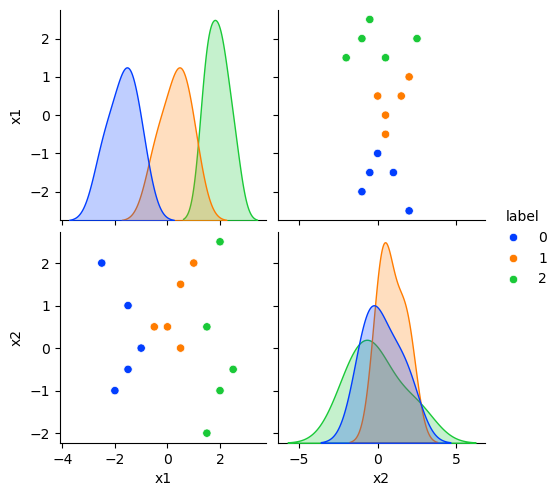

In [201]:
sns.pairplot(data=polymc_data, hue='label', palette='bright')
plt.show()

In [202]:
x=polymc_data.iloc[:,:-1]
y=polymc_data['label']

In [203]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [204]:
lr=LogisticRegression()

In [205]:
lr.fit(x_train,y_train)

LogisticRegression()

In [206]:
lr.score(x_test,y_test)

0.6666666666666666

In [207]:
cf=confusion_matrix(y_test,lr.predict(x_test))
cf

array([[1, 0, 0],
       [1, 0, 0],
       [0, 0, 1]])

<Axes: >

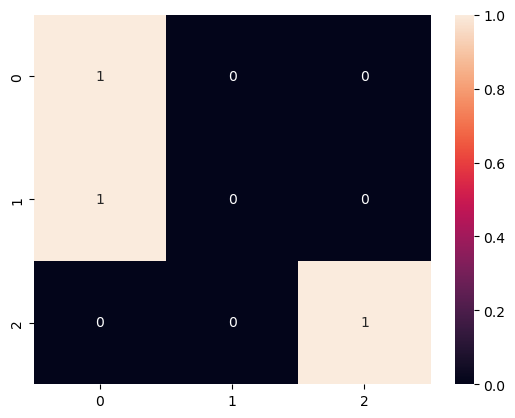

In [208]:
sns.heatmap(cf,annot=True)

In [209]:
lr=LogisticRegression(multi_class='ovr')

In [210]:
lr.fit(x_train,y_train)

C:\Anaconda\envs\ml_env\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='ovr')

In [211]:
lr.score(x_test,y_test)

0.6666666666666666

In [212]:
lr1=LogisticRegression(multi_class='multinomial')

In [213]:
lr1.fit(x_train,y_train)

C:\Anaconda\envs\ml_env\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [214]:
lr1.score(x_test,y_test)

0.6666666666666666

In [215]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score 

In [216]:
cf=confusion_matrix(y_test,lr1.predict(x_test))
print(y_test.shape)
print(cf)

(3,)
[[1 0 0]
 [1 0 0]
 [0 0 1]]


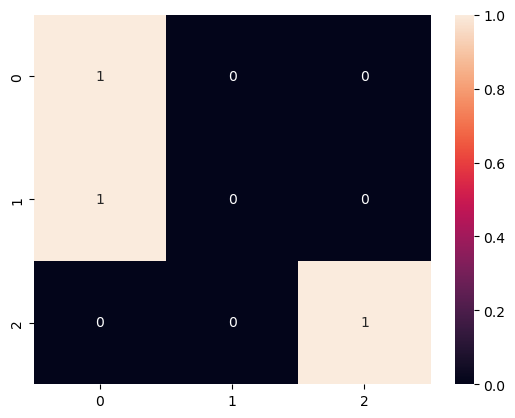

In [217]:
sns.heatmap(cf,annot=True)
plt.show()

In [218]:
precision_score(y_test,lr1.predict(x_test), average='micro')

0.6666666666666666

In [219]:
recall_score(y_test,lr1.predict(x_test), average='micro')

0.6666666666666666

In [220]:
f1_score(y_test,lr1.predict(x_test), average='micro')

0.6666666666666666

# Oversampling & Undersampling

In [221]:
!pip install imblearn

In [222]:
from imblearn.under_sampling import RandomUnderSampler

In [223]:
usdata=pd.read_csv('imbalanced_dataset.csv')

In [224]:
print(usdata.head())
print(usdata.shape)

   Feature1  Feature2  Label
0       5.1       3.5      0
1       4.9       3.0      0
2       6.2       3.4      0
3       5.9       3.0      0
4       6.0       3.0      1
(8, 3)


In [225]:
usdata.isnull().sum()

Feature1    0
Feature2    0
Label       0
dtype: int64

In [226]:
usdata['Label'].value_counts()


Label
0    4
1    2
2    2
Name: count, dtype: int64

In [227]:
x=usdata.iloc[:,:-1]
y=usdata['Label']

In [228]:
rus=RandomUnderSampler()

In [229]:
rus_x,rus_y=rus.fit_resample(x,y)

In [230]:
rus_x

,Feature1,Feature2
0,5.1,3.5
3,5.9,3.0
4,6.0,3.0
5,6.1,2.8
6,6.2,2.9
7,5.8,2.7


In [231]:
rus_y.value_counts()

Label
0    2
1    2
2    2
Name: count, dtype: int64

In [232]:
rus_y

0    0
3    0
4    1
5    1
6    2
7    2
Name: Label, dtype: int64

In [233]:
x_train,x_test,y_train,y_test=train_test_split(rus_x,rus_y,test_size=0.2,random_state=42)

In [234]:
uslr=LogisticRegression()

In [235]:
uslr.fit(x_train,y_train)

LogisticRegression()

In [236]:
uslr.score(x_test,y_test)

0.0

# Naive Bayes

In [237]:
nbdata=pd.read_csv('logistic_regression.csv')

In [238]:
nbdata.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


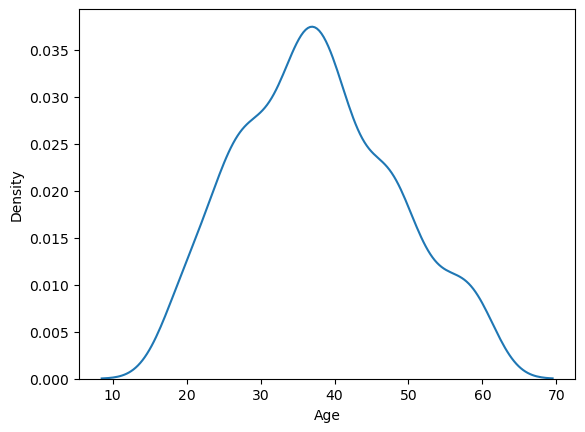

In [239]:
sns.kdeplot(data=nbdata['Age'])
plt.show()

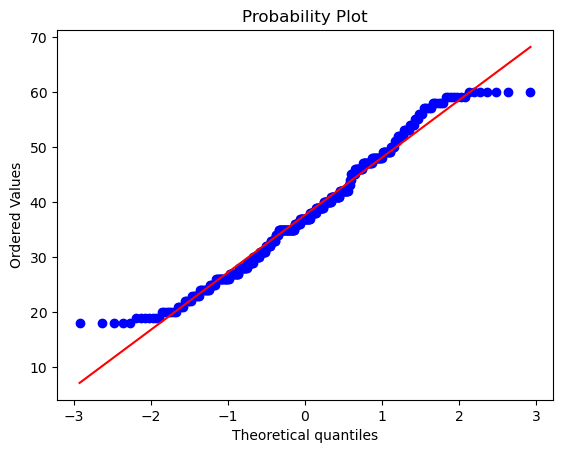

In [240]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(nbdata['Age'], dist="norm", plot=plt)
plt.show()


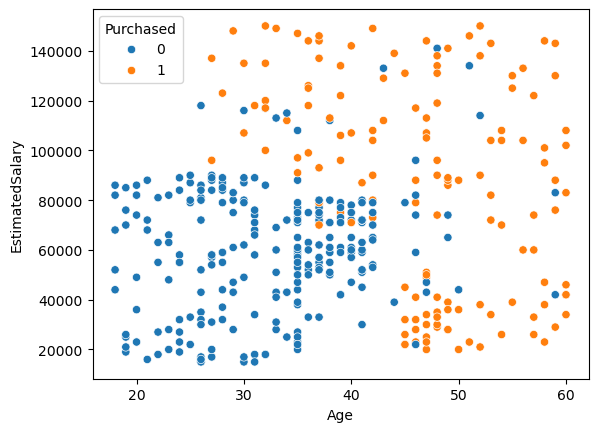

In [241]:
sns.scatterplot(x=nbdata['Age'], y=nbdata['EstimatedSalary'], hue=nbdata['Purchased'])
plt.show()

In [242]:
x=nbdata.iloc[:,:-1]
y=nbdata['Purchased']

In [243]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [244]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB


In [245]:
gnb=GaussianNB()

In [246]:
x=x.drop(columns='Gender')
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
gnb.fit(x_train,y_train)

GaussianNB()

In [247]:
gnb.score(x_test,y_test), gnb.score(x_train,y_train)

(0.925, 0.859375)

<Axes: >

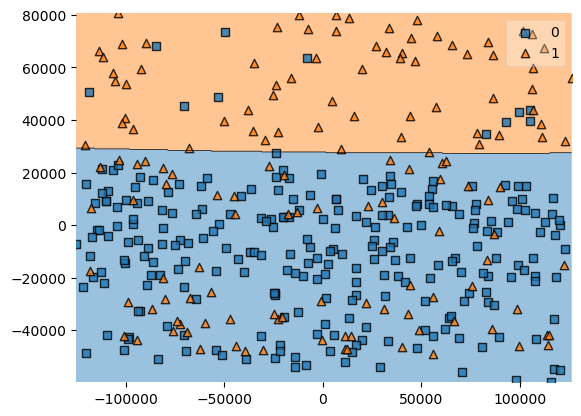

In [248]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

gnb.fit(x_pca, y)
plot_decision_regions(x_pca, y.to_numpy(), clf=gnb)


In [249]:
bnb=BernoulliNB()

In [250]:
bnb.fit(x_train,y_train)

BernoulliNB()

In [251]:
bnb.score(x_test,y_test), bnb.score(x_train,y_train)

(0.65, 0.640625)

In [252]:
mnb=MultinomialNB()

In [253]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [254]:
mnb.score(x_test,y_test), mnb.score(x_train,y_train)

(0.6375, 0.665625)

# Decision Trees

In [255]:
from sklearn.tree import DecisionTreeClassifier

In [256]:
dt=DecisionTreeClassifier(max_depth=2)

In [257]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [258]:
dt.score(x_train,y_train)

0.91875

In [259]:
dt.score(x_test,y_test)

0.9125

In [260]:
dte=DecisionTreeClassifier(max_depth=2,criterion='entropy')

In [261]:
dte.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [262]:
dte.score(x_train,y_train)

0.91875

In [263]:
dte.score(x_test,y_test)

0.9125

In [264]:
iterations=[]
train_scores=[]
test_scores=[]

for i in range(1,20):
    dt2=DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train,y_train)
    train_score=dt2.score(x_train,y_train)
    test_score=dt2.score(x_test,y_test)
    iterations.append(i)
    train_scores.append(train_score)
    test_scores.append(test_score)
    
dt2_data=pd.DataFrame({'train_score':train_scores,'test_score':test_scores,'Iteration':iterations})
print(dt2_data)

    train_score  test_score  Iteration
0      0.821875      0.9000          1
1      0.918750      0.9125          2
2      0.921875      0.9125          3
3      0.931250      0.9000          4
4      0.940625      0.8875          5
5      0.956250      0.8875          6
6      0.978125      0.8625          7
7      0.984375      0.8625          8
8      0.993750      0.8875          9
9      1.000000      0.8750         10
10     1.000000      0.8875         11
11     1.000000      0.8625         12
12     1.000000      0.8750         13
13     1.000000      0.8750         14
14     1.000000      0.8625         15
15     1.000000      0.8625         16
16     1.000000      0.8750         17
17     1.000000      0.8625         18
18     1.000000      0.8750         19


In [265]:
from sklearn.tree import plot_tree

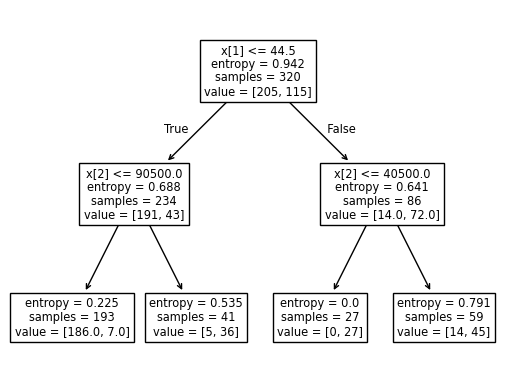

In [266]:
plot_tree(dte)
plt.show()

# SVM

In [267]:
svm_data=pd.read_csv('logistic_regression.csv')

In [268]:
svm_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [269]:
non_numeric_cols=svm_data.select_dtypes(exclude=[np.number]).columns.to_list()
svm_data=svm_data.drop(columns=non_numeric_cols+['User ID','EstimatedSalary'])

In [270]:
svm_data.head()

,Age,Purchased
0,19,0
1,35,0
2,26,0
3,27,0
4,19,0


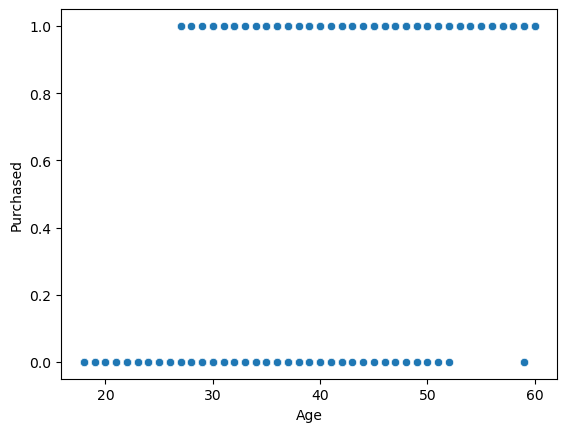

In [274]:
sns.scatterplot(x='Age',y='Purchased',data=svm_data)
plt.show()

In [275]:
x=svm_data.iloc[:,:-1]
y=svm_data.iloc[:,-1]

In [276]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [277]:
from sklearn.svm import SVC

In [278]:
svc=SVC(kernel='poly',degree=2)

In [279]:
svc.fit(x_train,y_train)

SVC(degree=2, kernel='poly')

In [280]:
svc.score(x_test,y_test)

0.9125

In [281]:
svc.score(x_train,y_train)

0.821875

C:\Anaconda\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


<Axes: >

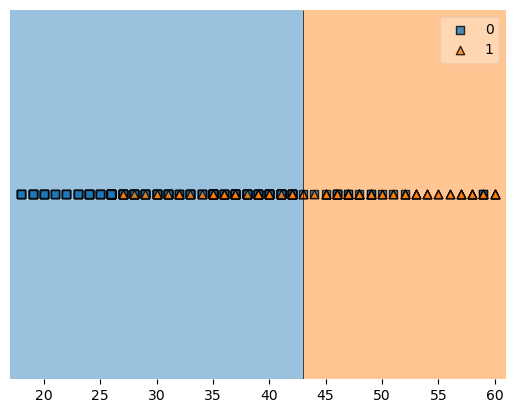

In [282]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=svc)

In [283]:
from sklearn.svm import SVR

In [284]:
svr=SVR(kernel='linear')

In [285]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [290]:
# for i in range(1,20):
#     svr=SVR(kernel='poly',degree=i)
#     svr.fit(x_train,y_train)
#     print('Test',svc.score(x_test,y_test),'Train',svc.score(x_train,y_train))

In [286]:
svc.score(x_test,y_test)

0.9125

In [287]:
svc.score(x_train,y_train)

0.821875

C:\Anaconda\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


<Axes: >

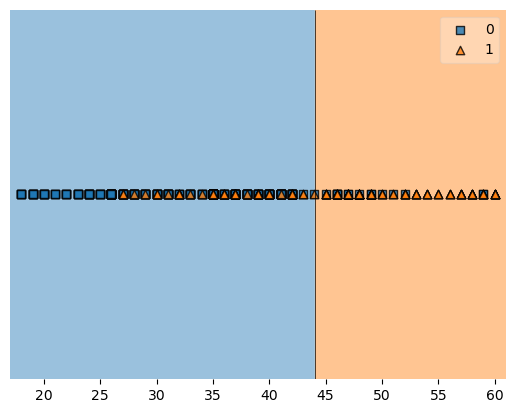

In [288]:
plot_decision_regions(x.to_numpy(),y.to_numpy(),clf=svr)

In [175]:
from sklearn.cluster import KMeans

In [176]:
data=pd.read_csv('kmeans_sample_data.csv')

In [177]:
data.head()

,Feature_1,Feature_2
0,2.248357,1.930868
1,2.323844,2.761515
2,1.882923,1.882932
3,2.789606,2.383717
4,1.765263,2.271280


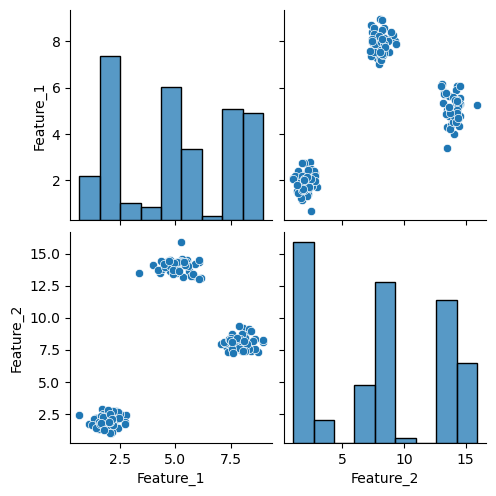

In [178]:
sns.pairplot(data=data)

In [179]:
data=data.select_dtypes(include=[np.number])

In [180]:
inertia=[]

In [181]:
for k in range(2,5):
    k_means=KMeans(n_clusters=k,random_state=42)
    k_means.fit(data)
    inertia.append(k_means.inertia_)

C:\Anaconda\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [182]:
inertia.sort()

In [183]:
inertia

[63.5544497981774, 71.54605356176832, 1909.6826071803944]

In [184]:
import matplotlib.pyplot as plt

In [185]:
k_values=list(range(1,len(inertia)+1))

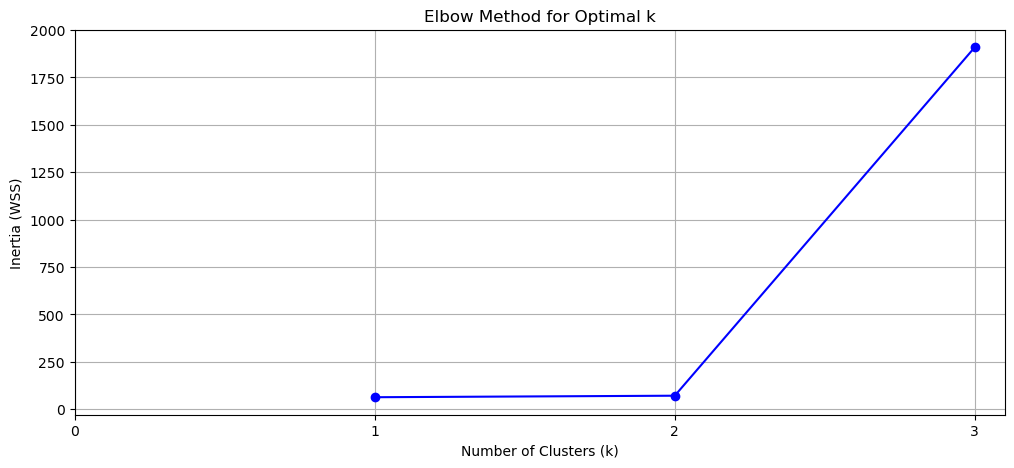

In [186]:
plt.figure(figsize=(12, 5))
plt.plot(k_values, inertia, marker='o', color='blue')

plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WSS)')
plt.grid(True)
plt.xticks(range(0, len(k_values)+1, 1))
plt.show()

In [209]:
k_mean=KMeans(n_clusters=2,random_state=0)

In [210]:
k_mean.fit(data)

C:\Anaconda\envs\ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [211]:
k_mean.score(data)

-2034.5226071803943

In [212]:
k_mean.inertia_

2034.5226071803943

In [213]:
labels =k_mean.predict(data)
print(labels)
data["Cluster"] = k_means.predict(data[["Feature_1", "Feature_2"]])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [214]:
new_data = [[4.5, 6.2]]
predicted_cluster = k_means.predict(new_data)
print(predicted_cluster)  

[3]


C:\Anaconda\envs\ml_env\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


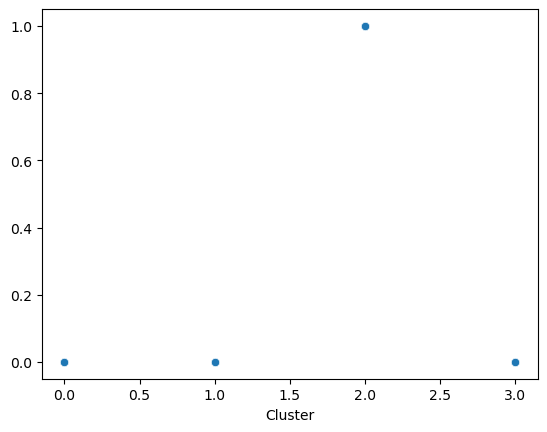

In [216]:
sns.scatterplot(x='Cluster',y=k_mean.predict(data),data=data)
plt.show()